# Projeto Final

## Reconhecimento de convicção através da fala para suporte ao ensino

Disciplina: Computação Afetiva - IA369Y

Prof. Paula D. P. Costa


Alunos:

    Diego Garrido
    Fernanda Ferreira
    Ricardo Keigo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
#from scipy.io.wavfile import read
import librosa
from librosa import display
import sklearn
#from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import StratifiedKFold, train_test_split
#from sklearn.cross_validation import StratifiedKFold
import numpy as np
from hmmlearn.hmm import GaussianHMM, MultinomialHMM
import re

/home/fernanda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def JitterAbs(pf): # período fundamental
    n = len(pf)
    sum1 = 0
    for i in range(n):
        if i > 0:
            sum1 = sum1 + abs(pf[i-1] - pf[i])
    sum1 = sum1 / (float(n - 1))
    return sum1

def JitterRatio(pf): #taxa entre o período fundamenta e a media dos periodos
    n = len(pf)
    sum1 = 0
    sum2 = 0
    for i in range(n):
        if i > 0:
            sum1 = sum1 + abs(pf[i-1] - pf[i])
        sum2 = sum2 + pf[i]
    sum1 = sum1 / (float(n - 1))
    sum2 = sum2 / (float(n))
    jit = (sum1/sum2)*1000
    #print jit
    return jit

def t0_acc(x):
    """Retorna o periodo fundamental de x, em amostras e os todos os periodos em amostras"""
    X = np.abs(np.fft.fft(x))
    r = np.real(np.fft.ifft(X*X))
    #print (int(len(r)/2))
    r2 = np.zeros(int(len(r)/2))
    for n in range(len(r2)):
        r2[n] = r[n]-r[n//2]
    r2 *= np.linspace(1, 0, len(r2))
    t0 = np.argmax(r2)
    p = []
    for i in range(0, len(x), t0):
        if i>0:
            p.append(i)
    return t0, p

In [3]:
datas_cer = glob.glob('audios_projeto_IA369Y/certeza/*.ogg')
datas_inc = glob.glob('audios_projeto_IA369Y/incerteza/*.ogg')

In [4]:
def jitters(datas):
    data_t0_list =[]
    data_p_list = []
    data_jitabs_list = []
    data_jitrat_list = []

    for file in sorted(datas):
        #input(file)
        audio, fs = librosa.core.load(file, sr=44100, mono=True)
        data_t0, data_p = t0_acc(audio)
        data_jitabs = JitterAbs(data_p)
        data_jitrat = JitterRatio(data_p)
        data_t0_list.append(data_t0)
        data_p_list.append(data_p)
        data_jitabs_list.append(data_jitabs)
        data_jitrat_list.append(data_jitrat)
    return data_jitrat_list, data_p

In [5]:
d_jitrat_cer, d_p_cer = jitters(datas_cer)
d_jitrat_inc, d_p_inc = jitters(datas_inc)

#print (type(d_jitrat_cer))
print (d_jitrat_cer)
print (d_jitrat_inc)
#print (d_p_cer)

[0.7196833393306944, 2.7472527472527473, 4.47427293064877, 2.758620689655172, 1.2618296529968456, 4.975124378109452, 10.471204188481677, 5.1020408163265305, 6.41025641025641, 1.3812154696132597, 1.8298261665141813, 2.155172413793103, 1.6051364365971108, 1.658374792703151, 2.7777777777777777, 1.8298261665141813, 1.243008079552517, 0.7945967421533572, 0.757862826828344, 4.830917874396135, 1.1574074074074074, 7.604562737642586, 0.7125044531528322, 2.306805074971165, 2.6143790849673203, 1.2820512820512822, 1.1337868480725624, 0.9242144177449169, 1.146131805157593, 1.0587612493382743, 2.509410288582183, 1.0934937124111537, 2.2396416573348263, 1.3774104683195594, 8.0, 1.9249278152069298, 1.6750418760469012]
[0.7867820613690008, 5.681818181818182, 2.1164021164021167, 5.698005698005698, 1.7123287671232876, 11.76470588235294, 1.5163002274450341, 1.486988847583643, 2.457002457002457, 1.160092807424594, 1.0346611484738748, 7.326007326007326, 1.7528483786152498, 1.7271157167530224, 0.8884940026654

In [6]:
#features_cer = np.array(d_jitrat_cer).reshape(1, -1)
#features_inc = np.array(d_jitrat_inc).reshape(1, -1)

#feature_all = np.hstack(features_cer, features_inc)
#print (feature_all.shape)
#lenghts = len(d_jitrat_inc)  
#print (lenghts)
features_cer = []
for n in d_jitrat_cer:
    features_cer.append([n])
    
features_inc = []
for n in d_jitrat_inc:
    features_inc.append([n])
    
#lenght_c = np.array(len(features_cer))
#lenght_i = np.array(len(features_inc))

#print (type(lenght_c))
    
print ("Caracteristicas incerteza: \n", features_inc, "\n")
print ("Caracteristicas certeza: \n", features_cer)

#X1 = [[0.5], [1.0], [-1.0], [0.42], [0.24]]

Caracteristicas incerteza: 
 [[0.7867820613690008], [5.681818181818182], [2.1164021164021167], [5.698005698005698], [1.7123287671232876], [11.76470588235294], [1.5163002274450341], [1.486988847583643], [2.457002457002457], [1.160092807424594], [1.0346611484738748], [7.326007326007326], [1.7528483786152498], [1.7271157167530224], [0.888494002665482], [2.932551319648094], [2.079002079002079], [1.28783000643915], [1.6273393002441008], [4.9504950495049505], [2.328288707799767], [2.254791431792559], [0.5242463958060288], [2.285714285714286], [0.2775850104094379], [1.2277470841006752], [3.766478342749529], [2.242152466367713], [1.465201465201465], [0.7977662544874351], [1.8993352326685662], [2.254791431792559], [1.443001443001443], [3.6968576709796674], [9.00900900900901], [1.4204545454545454], [1.1019283746556472]] 

Caracteristicas certeza: 
 [[0.7196833393306944], [2.7472527472527473], [4.47427293064877], [2.758620689655172], [1.2618296529968456], [4.975124378109452], [10.471204188481677]

### Implementação do HMM

In [7]:
import warnings
warnings.filterwarnings('ignore')

model1 = GaussianHMM(n_components=3, covariance_type='diag', n_iter=50)
#Parâmetros que determina a topologia left-right
#model.startprob_ = np.array([1.0, 0.0, 0.0])#, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) # len(stratprob) = n_components
#model.transmat_ = np.array([[0.5, 0.5, 0.0],
                           # [0.0, 0.5, 0.5],
                           # [0.0, 0.0, 1.0]])
model1.fit(features_cer)
#model1.fit(features_cer)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=50, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [17]:
model1.monitor_
#model1.monitor_.converged

ConvergenceMonitor(history=[-57.335252308821396, -57.33230973369023], iter=15,
          n_iter=50, tol=0.01, verbose=False)

In [9]:
model2 = GaussianHMM(n_components=3, covariance_type='diag', n_iter=50)
#Parâmetros que determina a topologia left-right
#model.startprob_ = np.array([1.0, 0.0, 0.0])#, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) # len(stratprob) = n_components
#model.transmat_ = np.array([[0.5, 0.5, 0.0],
                           # [0.0, 0.5, 0.5],
                           # [0.0, 0.0, 1.0]])

model2.fit(features_inc)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=50, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [19]:
model2.monitor_
#model2.monitor_.converged

ConvergenceMonitor(history=[-61.22299585672439, -61.21511190915112], iter=15,
          n_iter=50, tol=0.01, verbose=False)

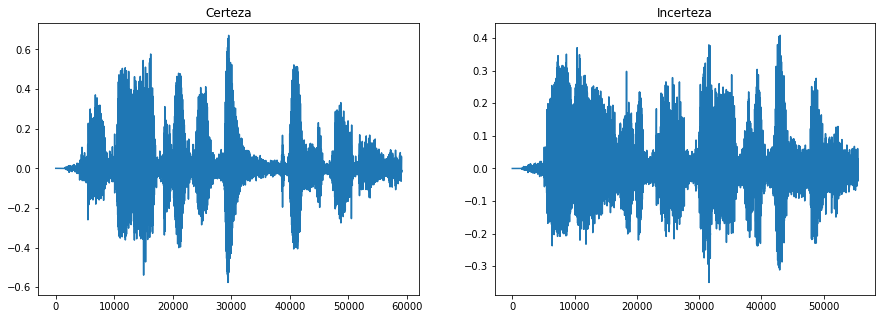

In [22]:
# Exemplo dos áudios quando o aluno tem certeza ou incerteza.
#s_cer, sr_cer = librosa.load('audios_projeto_IA369Y/I20/I20questao13.ogg')
#s_inc, sr_inc = librosa.load('audios_projeto_IA369Y/I20/I20questao11.ogg')
s_cer, sr_cer = librosa.load('audios_projeto_IA369Y/certeza/I22questao13.ogg')
s_inc, sr_inc = librosa.load('audios_projeto_IA369Y/incerteza/I22questao11.ogg')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(s_cer)
ax[0].set_title('Certeza')
ax[1].plot(s_inc)
ax[1].set_title('Incerteza')
plt.show()

In [23]:
s_cer_t0, s_cer_p = t0_acc(s_cer)
s_inc_t0, s_inc_p = t0_acc(s_inc)
print (s_cer_t0, s_inc_t0)
#print (s_cer_p)

s_inc_jitrat = JitterRatio(s_inc_p)
s_cer_jitrat = JitterRatio(s_cer_p)

print (s_inc_jitrat)
print (s_cer_jitrat)

50 48
1.7271157167530224
1.6920473773265652


### Testes utilizando áudios de controle

In [24]:
 #y_cer_m1 = model1.predict(s_cer_jitrat) # retorna viterbi
#y_inc_m1 = model1.predict(s_inc_jitrat)
#y_cer_m2 = model2.predict(s_cer_jitrat) # retorna viterbi
#y_inc_m2 = model2.predict(s_inc_jitrat)

y_pred_cer_m1 = model1.score(s_cer_jitrat) # retorna a prob.
y_pred_inc_m1 = model1.score(s_inc_jitrat) # retorna a prob.
y_pred_cer_m2 = model2.score(s_cer_jitrat) # retorna a prob.
y_pred_inc_m2 = model2.score(s_inc_jitrat) # retorna a prob.

print ('train certeza e test certeza:', y_pred_cer_m1)
print ('train certeza e test incerteza:', y_pred_inc_m1)
print ('train incerteza e test certeza:', y_pred_cer_m2)
print ('train incerteza e test incerteza:', y_pred_inc_m2)

train certeza e test certeza: -0.4995309988371823
train certeza e test incerteza: -0.5077956511556376
train incerteza e test certeza: -0.41520432653684036
train incerteza e test incerteza: -0.4321655674860212


In [14]:
if y_pred_inc_m2 >= -40:
    print ("Certeza")
else:
    print ("Incerteza")

Incerteza


### Condição para a saída